# `Segundo Bloque`

Interpolaci√≥n, splines y una segunda mirada al c√°lculo num√©rico.
- El problema a resolver.
- Interpolaci√≥n.
    - Interpolaci√≥n polinomial
        - Base monomial
        - Interpolaci√≥n de Lagrange
        - Interpolaci√≥n polinomial de Newton
        - Interpolaci√≥n c√∫bica-Spline
- Comparaci√≥n con `SciPy`

## El problema a resolver

En muchas ocasiones nos enfrentamos a situaciones donde no tenemos una expresi√≥n anal√≠tica, sino valores discretos que describen cierto comportamiento. Usualmente estos valores discretos no est√°n equiespaciados siendo necesario ''conocer'' en muchas ocasiones el valor correspondiente a un punto no reportado. En estos casos se puede proceder por dos v√≠as, realizar una INTERPOLACI√ìN de los datos, o realizar un FITTING a un modelo te√≥rico.

<center><img src="capturas/126.png"></center>

En esta clase nos centraremos en el primero de ellos, la `INTERPOLACI√ìN`.

B√°sicamente, el objetivo del presente aproximar una funci√≥n $f(x)$ mediante un conjunto de $n$ funciones b√°sicas $\phi_k(x)$ que, combinado con un conjunto de $n$ par√°metros indeterminados $c_k\; (k = 0, 1,..., n ‚àí 1)$ se utiliza para producir los datos. Matematicamente tendremos que:
$$
p(x)=\sum_{k=0}^{n-1}c_k \phi_k(x)
$$
donde $p(x)$ representa la aproximaci√≥n de la funci√≥n desconocida y las funciones $\phi_k(x)$ son linealmente independientes.


## Interpolation

Supongamos que tenemos un conjunto de datos $x_i$ independiente y $y_i$ dependientes, con $i=1, 2, ...$. Nos gustar√≠a encontrar una funci√≥n de estimaci√≥n $y(x)$ tal que $y(x_i)=y_i$ para cada punto de nuestro conjunto de datos. Esto significa que la funci√≥n de estimaci√≥n pasa por nuestros puntos de datos. Dado un nuevo $x_{new}$ podemos **interpolar** su valor usando $y(x_{new})$. En este contexto,  $y(x)$ se llama funci√≥n de interpolaci√≥n. La siguiente figura muestra el enunciado del problema de interpolaci√≥n.
<center><img src="capturas/fig1.png"></center>

La interpolaci√≥n no requiere que el usuario tenga un modelo subyacente para los datos, especialmente cuando hay muchos puntos de datos confiables. Sin embargo, los procesos que subyacen a los datos deben informar al usuario sobre la calidad de la interpolaci√≥n. Por ejemplo, nuestros datos pueden consistir en coordenadas (x,y) de un autom√≥vil a lo largo del tiempo. Dado que el movimiento est√° restringido a la f√≠sica de maniobra del autom√≥vil, podemos esperar que los puntos entre las coordenadas (x,y) en nuestro conjunto sean ‚Äúsuaves‚Äù en lugar de irregulares.

**En otras palabras**

La interpolaci√≥n surge cuando tenemos como entrada una conjunto de datos, $(x_j, y_j)$ para $j = 0, 1,. . . , n ‚àí 1$, que suponemos representa exactamente la $f(x)$ subyacente. Se definir√°n las funciones base $\phi_k(x)$ y se intentar√° determinar los $n$ par√°metros $c_k$. NOTAR como tenemos $n$ inc√≥gnitas y $n$ puntos de datos, por lo que podemos determinar todos los par√°metros desconocidos exigiendo que nuestra funci√≥n de aproximaci√≥n $p(x)$ pase exactamente por los puntos de datos de entrada (excepto por el error de redondeo), es decir:
$$
y_j=\sum_{k=0}^{n-1}c_k\phi_k(x_j)
$$
donde se uso que $p(x_j)=y_j$. En forma matricial se tendr√≠a que $\Phi C = Y$ 
<center><img src="capturas/127.png"></center>

N√ìTESE que una ves definida las funciones $\phi_k$ se puede resolver el sistema de ecuaciones. Como se puede inferir un interpolador de no es √∫nico (aunque cada interpolador tiene que pasar por los puntos de datos) ya que depende de c√≥mo se escojan las funciones $\phi_k$. Sin embargo, las funciones escogidas deben cumplir ciertos criterios como suavidad, monotonicidad, etc. Es decir, el interpolante debe comportarse `razonablemente`. En este curso nos centraremos en tres enfoques diferentes para los interpolantes:
- `Interpolaci√≥n polinomial`: este enfoque, supone que un solo polinomio puede capturar eficiente y efectivamente el comportamiento de la funci√≥n subyacente. **√âsta es una gran suposici√≥n**.
- `Interpolaci√≥n polin√≥mica por partes`: este enfoque divide los puntos de datos en subintervalos y se emplea un polinomio de bajo grado diferente en cada subintervalo.
- `Interpolaci√≥n trigonom√©trica`: este enfoque se utiliza para el caso de datos peri√≥dicos. Como veremos ser√° necesario introducir uno de los algoritmos m√°s famosos que existen, la transformada r√°pida de Fourier.


### Interpolaci√≥n polinomial

La interpolaci√≥n polinomial se refiere al caso en el que la funci√≥n de interpolaci√≥n $p(x)$ es un polinomio, note que la funci√≥n subyacente $f(x)$ que est√° intentando aproximar no tiene por qu√© ser un polinomio, puede ser cualquier cosa.

#### Base monomial

La elecci√≥n m√°s simple y natural para las funciones base $œÜ_k(x)$ es utilizar monomios:
$$œÜ_k(x)=x^k$$

<center><img src="capturas/128.png"></center>

Usando la elecci√≥n anterior tendremos que el polinomio de interpolaci√≥n $p(x)$ toma la forma:
$$
p(x)=c_0 + c_1 x+ c_2 x^2+\dots + c_{n-1} x^{n-1}
$$

La forma m√°s ingenua para encontrar las inc√≥gnitas es evaluar el polinomio en los puntos, es decir:
<center><img src="capturas/129.png"></center>

lo que se traduce a:
<center><img src="capturas/130.png"></center>

Esta matriz de coeficientes $n \times n$ (no sim√©trica) se conoce como matriz de `Vandermonde`. El determinante de una matriz de Vandermonde es distinto de cero para distintos nodos $x_j$; por tanto, una matriz de Vandermonde no es singular. Como resultado, las columnas de la matriz de Vandermonde son linealmente independientes. Esto significa que si emplea operaciones $O(n^3)$ como m√°ximo para encontrar los par√°metros $c_k$.

#### Interpolaci√≥n de Lagrange

La interpolaci√≥n de Lagrange se introduce en la mayor√≠a de los libros de texto sobre m√©todos num√©ricos. Sin embargo, despu√©s de algunos comentarios introductorios, el enfoque generalmente se abandona por otros m√©todos, por ejemplo, la interpolaci√≥n de Newton (es un caso particular), t√≠picamente despu√©s de afirmar que la forma de Lagrange es buena para demostrar teoremas pero no tiene valor pr√°ctico. Como veremos, la interpolaci√≥n de Lagrange es √∫til tanto formalmente como en la pr√°ctica.

Antes de discutir c√≥mo realizar la interpolaci√≥n, introduzcamos lo que se conoce como puntos cardinales o Lagrange o polinomios fundamentales (lo vimos anteriormente).
$$
L_k(x)=\frac{\prod_{j=0, j\neq k}^{n-1}(x-x_j)}{\prod_{j=0, j\neq k}^{n-1}(x_k-x_j)}, \quad k=0, 1, \dots, n-1
$$

Notar que el denominador solo depende de $x_j$, es decir, de los puntos de interpolaci√≥n, por lo que es claramente una constante (no depende de x). El numerador es un polinomio en $x$ de grado $n ‚àí 1$. El polinomio de Lagrange $L_k(x)$ es $1$ en $x_k$, ya que el numerador y el denominador son iguales entre s√≠ en ese caso y cero para un $k$ dado en $x_j$ cuando $j ‚â• k$. Resumiendo
$$
L_k(x_j)=\delta_{kj}.
$$

Veamos unos ejemplos. Independientemente de d√≥nde se coloquen los $x_j$, as√≠ es como se ven los tres polinomios de Lagrange para el caso de $n = 3$:
<center><img src="capturas/131.png"></center>

Utilizando los polinomios cardinales como funciones base; es decir $\phi_k(x) = L_k(x)$ tendremos
<center><img src="capturas/132.png"></center>

como se aprecia no necesitamos usar $c_k$ en nuestra definici√≥n del polinomio de interpolaci√≥n, ya que simplemente podemos escribir $y_k$ (los valores y de nuestros datos de entrada) en su lugar. Para ver por qu√© esto est√° permitido, examinemos el valor de $p(x)$ en nuestros nodos:
<center><img src="capturas/133.png"></center>

Como se aprecia llegamos a la igualdad $p(x_j) = y_j$, lo cual es la definici√≥n de lo que significa ser un polinomio de interpolaci√≥n. Esto conlleva a no tener que incluir $c_k$ al utilizar polinomios cardinales (que van a $0$ y a $1$ en los lugares correctos) en lugar de monomios. 

`Con este resultado hemos logrado evitar encontrarnos con una matriz de Vandermonde (posiblemente mal condicionada)`, sin embargo, el costo computacional es alto $O(n^2)$ cada vez que se evalua en un punto $x$. Para simplificar este problema se suele utilizar la `f√≥rmula baricentr√≠ca de interpolaci√≥n` (barycentric interpolation formula). 
<center><img src="capturas/134.png"></center>

donde los pesos $w_k$ se definen como
<center><img src="capturas/135.png"></center>

Observe que las dos sumas son casi id√©nticas: la primera involucra los valores de los datos de entrada $y_k$, mientras que la segunda no. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Implementaci√≥n:
def weights(dataxs):
    n = dataxs.size
    ws = np.ones(n)
    for k in range(n):
        for j in range(n):
            if j == k:
                continue
            ws[k] *= (dataxs[k]-dataxs[j])
    return 1/ws

def bary(dataxs, datays, ws, x):
    k = np.where(x == dataxs)[0]
    if k.size == 0:
        nume = np.sum(ws*datays/(x-dataxs))
        denom = np.sum(ws/(x-dataxs))
        val = nume/denom
    else:
        val = datays[k[0]]
    return val

In [3]:
# Range funci√≥n
func = lambda x: 1/(1+25*x**2)

# generando datos ficticios
def generatedata(n, f, nodes="cheb"):
    if nodes=="cheb":
        dataxs = -np.cos(np.linspace(0,np.pi,n))
    else:
        dataxs = np.linspace(-1,1,n) 
    
    datays = f(dataxs)
    return dataxs, datays

In [4]:
dataxs, datays = generatedata(15, func)
ws = weights(dataxs)
x = 0.3
pofx = bary(dataxs, datays, ws, x)

print(x, pofx, func(x))

dataxs, datays = generatedata(30, func)
ws = weights(dataxs)
pofx = bary(dataxs, datays, ws, x)

print(x, pofx, func(x))

0.3 0.2592750581841138 0.3076923076923077
0.3 0.3091978256811317 0.3076923076923077


Como notamos, para $n=15$ la coincidencia no es muy buena, sin embargo para $n=30$ mejor√≥ mucho.

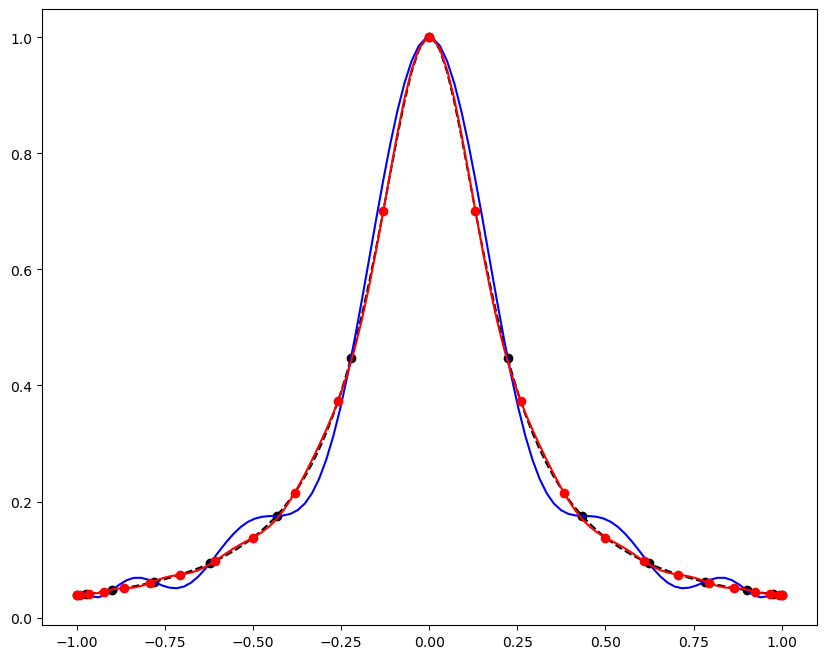

In [14]:
pof1x = lambda x, ws, dataxs, datays: bary(dataxs, datays, ws, x)
x = np.linspace(-1, 1, 100)

fig = plt.figure(figsize = (10,8))
plt.plot(x, func(x), 'k--')

# usando 15 datos
dataxs, datays = generatedata(15, func)
ws = weights(dataxs)
daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ko')
plt.plot(x, daty, c='b')

# usando 25 datos
dataxs, datays = generatedata(25, func)
ws = weights(dataxs)
daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ro')
plt.plot(x, daty, c='r')

### Interpolaci√≥n polinomial de Newton

La interpolaci√≥n polinomial de Newton es otra forma popular de ajustar exactamente un conjunto de datos. La forma general del polinomio de Newton de orden $ n-1 $ que pasa por $ n $ puntos es:

$$ f(x) = a_0 + a_1(x-x_0) + a_2(x-x_0)(x-x_1) + \dots + a_n(x-x_0)(x-x_1)\dots(x-x_n)$$

que se puede reescribir como:

$$ f(x) = \sum_{i=0}^{n}{a_in_i(x)}$$ 

donde $$ n_i(x) = \prod_{j=0}^{i-1}(x-x_j)$$

La caracter√≠stica particular del polinomio de Newton es que los coeficientes $ a_i $ pueden determinarse mediante un procedimiento matem√°tico muy simple que los casos anteriores. Por ejemplo, dado que el polinomio debe pasar por cada uno de los datos, $ (x_i, y_i) $, tendremos $ f (x_i) = y_i $, por lo que tendremos

$$f(x_0) = a_0 = y_0$$

y

$$
f(x_1) = a_0 + a_1(x_1-x_0) = y_1,
$$

reorganiz√°ndolo para obtener $ a_1 $, tendremos:
$$a_1 = \frac{y_1 - y_0}{x_1 - x_0}$$

Ahora, inserte los puntos de datos $ (x_2, y_2) $, podemos calcular $ a_2 $, y tiene la forma:
$$a_2 = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0}$$

Hagamos un punto de datos m√°s $ (x_3, y_3) $ para calcular $ a_3 $, despu√©s de insertar el punto de datos en la ecuaci√≥n, obtenemos:

$$a_3 = \frac{\frac{\frac{y_3-y_2}{x_3-x_2} - \frac{y_2 - y_1}{x_2-x_1}}{x_3 - x_1} - \frac{\frac{y_2-y_1}{x_2-x_1}-\frac{y_1 - y_0}{x_1 - x_0}}{x_2-x_0}}{x_3 - x_0}$$


Ahora, ¬øves los patrones? Estos se denominan **diferencias divididas**, si definimos:

$$ f[x_1, x_0] = \frac{y_1 - y_0}{x_1 - x_0}$$

$$ f[x_2, x_1, x_0] = \frac{\frac{y_2 - y_1}{x_2 - x_1} - \frac{y_1 - y_0}{x_1 - x_0}}{x_2 - x_0} = \frac{f[x_2,x_1] - f[x_1,x_0]}{x_2-x_1}$$

Continuamos escribiendo esto, tendremos la siguiente ecuaci√≥n de iteraci√≥n:

$$ f[x_k, x_{k-1}, \dots, x_{1}, x_0] = \frac{f[x_k, x_{k-1}, \dots, x_{2}, x_2] - f[x_{k-1}, x_{k-2}, \dots, x_{1}, x_0]}{x_k-x_0}$$


Podemos ver una belleza del m√©todo es que, una vez que se determinan los coeficientes, agregar nuevos puntos de datos no cambiar√° los calculados, solo necesitamos calcular las diferencias m√°s altas contin√∫a de la misma manera. Todo el procedimiento para encontrar estos coeficientes se puede resumir en una tabla de diferencias divididas. Veamos un ejemplo usando 5 puntos de datos:

$$
\begin{array}{cccccc}
x_0 & y_0 \\
    &     & f[x_1,x_0] \\
x_1 & y_1 &             & f[x_2, x_1,x_0]\\
    &     & f[x_2,x_1]  &              & f[x_3, x_2, x_1,x_0]\\
x_2 & y_2 &             & f[x_3, x_2,x_1] &             & f[x_4, x_3, x_2, x_1,x_0]\\
    &     & f[x_3,x_2]  &              & f[x_4, x_3, x_2, x_1]\\
x_3 & y_3 &             & f[x_4, x_3,x_2]\\
    &     & f[x_4,x_3] \\
x_4 & y_4
\end{array}
$$

Cada elemento de la tabla se puede calcular utilizando los dos elementos anteriores (a la izquierda). En realidad, podemos calcular cada elemento y almacenarlos en una matriz diagonal, es decir, la matriz de coeficientes se puede escribir como:

$$
\begin{array}{cccccc}
y_0 & f[x_1,x_0] & f[x_2, x_1,x_0] & f[x_3, x_2, x_1,x_0] & f[x_4, x_3, x_2, x_1,x_0]\\
y_1 & f[x_2,x_1] & f[x_3, x_2,x_1] & f[x_4, x_3, x_2, x_1] & 0\\
y_2 & f[x_3,x_2] & f[x_4, x_3,x_2] & 0          & 0 \\
y_3 & f[x_4,x_3] & 0 & 0 & 0            \\
y_4 & 0 & 0 & 0  & 0  
\end{array}
$$

Tenga en cuenta que la primera fila de la matriz son en realidad todos los coeficientes que necesitamos, es decir, $ a_0, a_1, a_2, a_3, a_4 $. Veamos un ejemplo de c√≥mo podemos hacerlo.

#### Ejercicio

Calcula la tabla de diferencias divididas para x = [-5, -1, 0, 2], y = [-2, 6, 1, 3].

In [5]:
def divided_diff(x, y):
    '''
    funci√≥n para calcular el termino dividido
     tabla de diferencias
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1])/(x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluar el polinomio de newton
     en x 
    '''
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

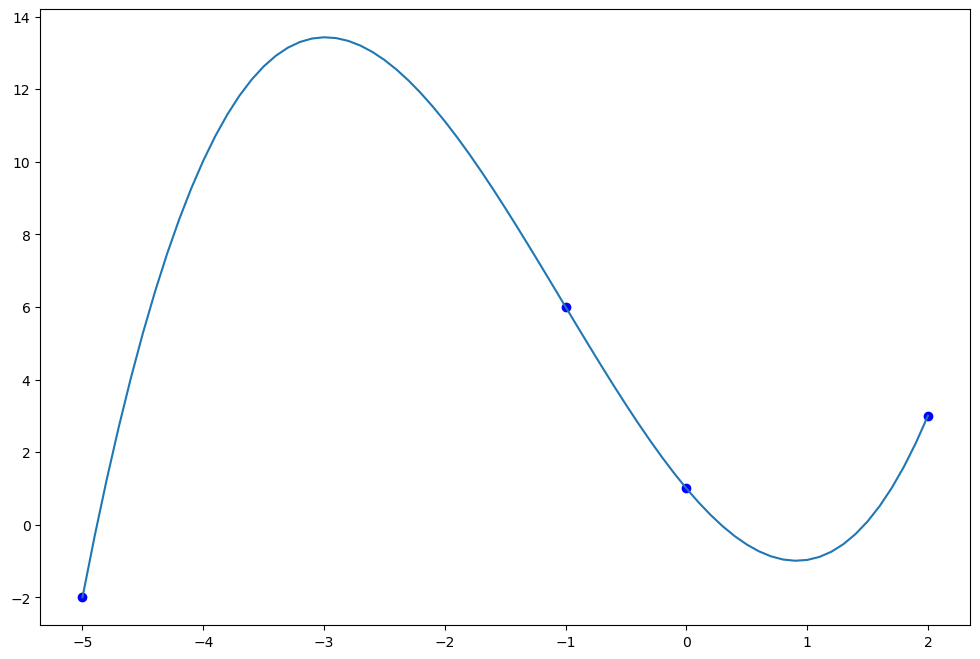

In [6]:
x = np.array([-5, -1, 0, 2])
y = np.array([-2, 6, 1, 3])

# obteniendo los coef
a_s = divided_diff(x, y)[0, :]

# evaluando los nuevos puntos
x_new = np.arange(-5, 2.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)

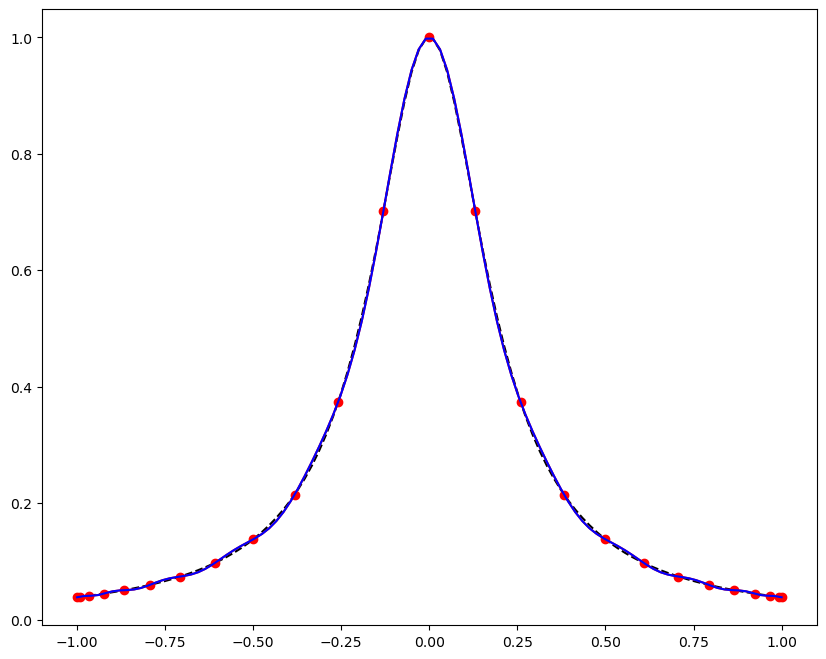

In [10]:
pof1x = lambda x, ws, dataxs, datays: bary(dataxs, datays, ws, x)
x = np.linspace(-1, 1, 100)

fig = plt.figure(figsize = (10,8))
plt.plot(x, func(x), 'k--')

# usando 25 datos
dataxs, datays = generatedata(25, func)
ws = weights(dataxs)
a_s = divided_diff(dataxs, datays)[0, :]

daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ro')
plt.plot(x, daty, c='r')

y_new = newton_poly(a_s, dataxs, x)
plt.plot(x, y_new, c='b')

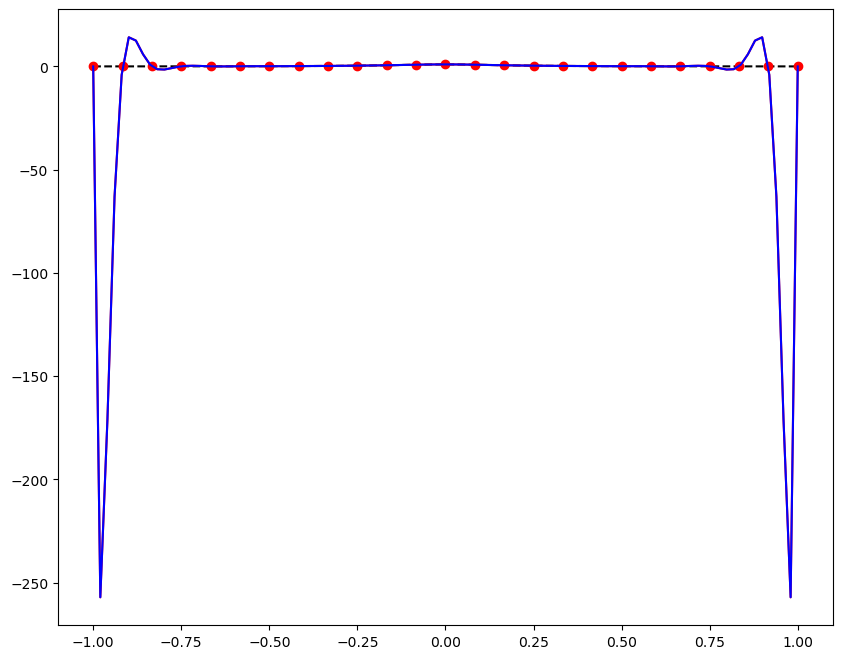

In [14]:
pof1x = lambda x, ws, dataxs, datays: bary(dataxs, datays, ws, x)
x = np.linspace(-1, 1, 100)

fig = plt.figure(figsize = (10,8))
plt.plot(x, func(x), 'k--')

# usando 25 datos
dataxs, datays = generatedata(25, func, nodes='none')
ws = weights(dataxs)
a_s = divided_diff(dataxs, datays)[0, :]

daty = [pof1x(i, ws, dataxs, datays) for i in x]
plt.plot(dataxs, datays, 'ro')
plt.plot(x, daty, c='r')

y_new = newton_poly(a_s, dataxs, x)
plt.plot(x, y_new, c='b')

**¬°¬°¬øQu√© pas√≥ arriba?!!**

El polinomio interpolador puede presentar comportamientos patoloÃÅgicos, en el sentido de que, cuando aumentamos el nuÃÅmero de puntos de interpolacioÃÅn en un intervalo, la desviacioÃÅn maÃÅxima entre el polinomio y la funcioÃÅn en dicho intervalo aumente con el grado del polinomio.

En este caso ocurri√≥ al aumentar el grado del polinomio interpolado de estas funciones con puntos igualmente espaciados. Siempre que tengamos la libertad de escoger los puntos, la mejor elecci√≥n es la que miminiza el error, en estos caso si se eligen los puntos de interpolacioÃÅn como los ceros de los polinomios de Chebychev, definidos por:
<center><img src="capturas/136.png"></center>

donde como se aprecia los ceros estar√°n definidos en el intervalo $[-1,1]$, as√≠ que para una funci√≥n definida en un intervalo $[a, b]$ tendremos que realizar los cambios de variables
<center><img src="capturas/137.png"></center>

de tal forma que ahora se mapee $f(x)\to f(t)$ que toma valores dentro del intervalo $[-1,1]$.

¬øQu√© hacer sino tenemos libertad para escoger los puntos?

### Interpolaci√≥n Lineal
En la interpolaci√≥n lineal, se supone que el punto estimado se encuentra en la l√≠nea que une los puntos m√°s cercanos a la izquierda y a la derecha. Suponga, sin p√©rdida de generalidad, que $x_i<x<x_{i+1}$. Entonces la interpolaci√≥n lineal en $x$ es:

$y(x)=y_i+\frac{(y_{i+1}-y_{i})(ùë•‚àíùë•_i)}{x_{i+1}-x_i}$

La funci√≥n `interp1d`, es la funci√≥n en Scipy que nos permite hacer este tipo de interpolaciones.

- Ejercicio: Encuentre la interpolaci√≥n lineal en $x=1.5$ para los datos  x = [0, 1, 2], y = [1, 3, 2]. Verifique el resultado usando la funci√≥n `interp1` de scipy.

Respuesta:

Dado que $1<x<2$, usamos el segundo y tercer punto de datos para calcular la interpolaci√≥n lineal.

$y(1.5)=3+\frac{(2-3)(1.5‚àí1)}{2-1}=2.5$

### Interpolaci√≥n C√∫bica (Cubic Spline Interpolation)

En la interpolaci√≥n **spline** c√∫bica (como se muestra en la siguiente figura), la funci√≥n de interpolaci√≥n es un conjunto de funciones c√∫bicas por partes. Espec√≠ficamente, asumimos que los puntos $(x_i, y_i)$ y $(x_{i+1}, y_{i+1})$ est√°n unidos por un polinomio c√∫bico $S_i(x)= a_i x^{3} + b_i x^{2}+ c_i x+ d_i$ que es v√°lido para $x_i\leq x\leq x_{i+1}$ para $i = 1,..., n-1$. Para encontrar la funci√≥n de interpolaci√≥n, primero debemos determinar los coeficientes $a_i, b_i, c_i, d_i$ para cada una de las funciones c√∫bicas. Para $n$ puntos, hay que encontrar $n-1$ funciones c√∫bicas, y cada funci√≥n c√∫bica requiere cuatro coeficientes. Por lo tanto, tenemos un total de $4(n-1)$ inc√≥gnitas, por lo que necesitamos $4(n‚àí1)$ ecuaciones independientes para encontrar todos los coeficientes.
<center><img src="capturas/fig2.png"></center>

Primero sabemos que las funciones c√∫bicas deben intersecar los datos con los puntos de la izquierda y la derecha:
<center><img src="capturas/fig3.png"></center>

lo que nos da $2(n-1)$ ecuaciones. A continuaci√≥n, queremos que cada funci√≥n c√∫bica se una lo m√°s suavemente posible con sus vecinas, por lo que restringimos las **splines** para que tengan una primera y segunda derivadas continuas en los puntos de datos $ i= 2,‚Ä¶, n-1$
<center><img src="capturas/fig4.png"></center>

lo que nos da $2(n-2)$ ecuaciones.

Se requieren dos ecuaciones m√°s para calcular los coeficientes de $S_i(x)$. Estas dos √∫ltimas restricciones son arbitrarias y se pueden elegir para adaptarse a las circunstancias de la interpolaci√≥n que se est√° realizando. Un conjunto com√∫n de restricciones finales es asumir que las segundas derivadas son cero en los puntos finales. Esto significa que la curva es una "l√≠nea recta" en los puntos finales. Expl√≠citamente,
<center><img src="capturas/fig5.png"></center>

En Python, podemos usar la funci√≥n `CubicSplin` de scipy para realizar la interpolaci√≥n de splines c√∫bicos. Como comentario las restricciones anteriores no son las mismas que las utilizadas por `CubicSplin` de scipy por defecto para realizar splines c√∫bicos, hay diferentes formas de agregar las dos restricciones finales en scipy estableciendo el argumento **bc_type** (consultar la ayuda de `CubicSplin` para obtener m√°s informaci√≥n sobre esto).

#### Ejercicio: 
Utilice `CubicSplin` para trazar la interpolaci√≥n spline c√∫bica del conjunto de datos x = [0, 1, 2] e y = [1, 3, 2] para $0\leq x \leq 2$